<a id="top"></a>
# ADS1001 Group project 
## Rent Realities: What Affects Prices, Future Trends and Smart Choices.

Group members:
- Zhen Xue, Gue (33521352)
- Chun Kei, Chow (33520771)
- Sunaina, Rayaprol (33944091)
- Hui Shawn, Lim (34017259)

<hr>



## About this Notebook

<hr style="height: 1px; background-color: #ccc">
Project Updates:<br><br> 

**23 May 2024 by Gue:** <br>
1. Finalised the ipynb notebook.

**17 May 2024 by Chow:** <br>
1. Added a new model based on the Random Forest regression model
2. Group the monthly rent based on the mean by completion year to create the model.

**16 May 2024 by Lim:**<br>
1. Completed background section.
2. Proofread the notebook, added comments and several references to explain certain observations.

**14 May 2024 by Chow:**<br>
1. Created a few multiple linear regression predictive models mainly based on monthly rental and completion year
2. Completed analysis and observation on rental vs completion year and property type based on online researches

**12 May 2024 by Gue:**<br>
1. Combined all notebook together.<br>
2. Initialised the necessary data collection, and completed the data cleaning process.<br>
3. Completed data manipulation and data visualisation for the factor of city, area, number of rooms, bathrooms and size.<br>

**30 April 2024 by Gue:**<br>
1. Initialised data manipulation on geographical location.<br>


**23 April 2024 by Lim:**<br>
1. Initialised the notebook.<br>
2. Completed initial data cleaning of the dataset.<br>
3. Checked the relation between continious data.<br>




## Section 1: Background
<hr style="height: 1px; background-color: #ccc">

Klang Valley (Malay: *Lembah Klang*), an urban conglomeration in Malaysia, is a region that encompasses the national capital, **Kuala Lumpur**, and the state of **Selangor**. It is not only the cultural, political, and economic heart but also one of the most urbanised and developed regions in Malaysia, but also overflowing with job opportunities. It is also a destination loved by many international visitors, whether for short or long-term stays.

<br>
However, the indeterminable housing prices in the cities in Klang Valley require people from all walks of life to focus on the housing rental market and its trends (Zainon et al., 2017). Understanding the current trends in house rental pricing is important for several reasons:

- For renters, it will greatly help in budgeting and financial planning, as well as locating rentals in areas most suitable to individual needs and affordability;
- For landlords, the market trends serve as a great reference to set rents that are competitive to attract and retain tenants.
<br>

Additionally, these trends can assist property agents in advising clients, helping every client find a suitable house rental. Furthermore, the market trend also reflects the economic health of an area, which indicates employment rates, population growth, and economic development of that area (Hayes, 2023). These factors are important for investors and property developers to ensure strategic decision-making with minimal risk of loss. Thus, many stakeholders would benefit from understanding the patterns and predictions of the latest house rental pricing trends (Hayes, 2023).
<br>
<br>
Therefore, in this project, we aim to examine the current trends in house rental pricing in KL and Selangor areas by exploring the current data in `malaysia_house_rental_price_data.csv` and investigating the factors behind it. 
<br>
<br>
We will be analysing the data and making several models, including Gaussian mixture models for clustering, Polynomial Regression Model  to describe investigable factors, and Multiple Linear Regression model to determine the relationship between multiple factors. 
<br>
<br>
Lastly, we will be discussing all of our findings.




## Section 2: Define Questions and Issues
<hr style="height: 1px; background-color: #ccc">

Before analyzing the data, our group discussed the issues concerning the housing in Klang Valley area. <br><br>

We agreed to focus on **rental price**, and formulated four key questions regarding house rental prices.

<br>**The 4 questions are as below:**
1. What factors significantly influence house rentals?<br><br>

2. How to predict the  movement of rental in future years based on previous trends?<br><br>

3. How to find the most suitable rental area (or property name, type etc) to be invested in, or rented?<br><br>

4. For property developers, where to potentially build a new housing area?


## Section 3: Data Pre-processing
<hr style="height: 1px; background-color: #ccc">

### 3.1 - Viewing the data
Our first step in handling the data is to examine it's structure and contents.<br><br> In this section, the House Rental Pricing dataset was imported. 
Then, we read the dataset of house rental price (`hrp`), and show how it looks like.

In [48]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

# Models
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

# Folium
import folium
from folium.plugins import HeatMap,  MarkerCluster

# Time
import time

# Geopy
from geopy.geocoders import Nominatim
from geopy.distance import geodesic

warnings.filterwarnings("ignore")

In [49]:
# importing the dataset
hrp = pd.read_csv('malaysia_house_rental_price_data.csv')
hrp.head()

,prop_name,completion_year,monthly_rent,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,city,area
0,The Hipster @ Taman Desa,2022.0,4200.0,Condominium,5.0,2.0,6.0,1842.0,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur,Taman Desa
1,Segar Courts,NaN,2300.0,Condominium,3.0,1.0,2.0,1170.0,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur,Cheras
2,Pangsapuri Teratak Muhibbah 2,NaN,1000.0,Apartment,3.0,NaN,2.0,650.0,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",NaN,Kuala Lumpur,Taman Desa
3,Sentul Point Suite Apartment,2020.0,1700.0,Apartment,2.0,1.0,2.0,743.0,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur,Sentul
4,Arte Mont Kiara,NaN,1299.0,Service Residence,1.0,1.0,1.0,494.0,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur,Mont Kiara


At first glance, some parts of the CSV file were missing data, among other issues. Therefore, we had to clean the data to make it ready for analysis.

<hr>

### 3.2 - Data Cleaning


We identified and addressed issues in the data set to ensure it is clean, reliable, and useful for our analysis.

1. **Repetitive Information**<br> There are repetitive data in `facilities` and `additional_facilities`, but with different entries, because the data was recorded cumulatively as a string. <br><br>

2. **Blank Cells** <br> There are numerous instances of missing data throughout the dataset.<br><br>

3. **Not-referable `monthly-rent` and `size` Information**<br> Some rental fee seems unreasonable. e.g., "rent: `RM240000` in `Sunway Vivaldi`" and "size: `1` in `Kelana Sentral`.<br><br>

4. **Inconsistent City Names** <br> `Kuala Lumpur ` and `Selangor ` should be corrected to `Kuala Lumpur` and `Selangor`.<br><br>

5. **Inconsistent data types** <br> Some columns have undesired datatype. i.e., `year` (float64).<br><br>

Therefore, we devised an action plan for the data cleaning process.<br><br>

**_Action Plan regarding Data Cleaning:_**<br><br>
3.2.1 - Merge the `facilities` and `additional_facilities` columns.<br>
3.2.2 - Remove blank cells<br>
3.2.3 - Take necessary confidence interval of the `monthly_rent` and `size` columns.<br>
3.2.4 - Correct the formatting of `city` names.<br>
3.2.5 - Correct all columns in desired datatype.


<hr>

#### 3.2.1 Merge the `facilities` and `additional_facilities` columns.

The variables `facilities` and `additional_facilities` cover similar aspects of the houses. In the dataset, some entries were missing data for either `facilities` or `additional_facilities`. To ensure a more reliable analysis, these two variables were merged into a single variable, `facilities`, which incorporates data from both original variables. This approach allows us to retain as much information as possible while only dropping entries that lack data for both

In [50]:
# merging facilities and additional_facilities
hrp["facilities"] = hrp["facilities"] + hrp["additional_facilities"]
hrp = hrp.drop(columns = "additional_facilities")
hrp["facilities"] = hrp["facilities"].str.split(", ")

In [51]:
# checking the updated dataframe
hrp.head()

,prop_name,completion_year,monthly_rent,property_type,rooms,parking,bathroom,size,furnished,facilities,city,area
0,The Hipster @ Taman Desa,2022.0,4200.0,Condominium,5.0,2.0,6.0,1842.0,Fully Furnished,"[Minimart, Gymnasium, Security, Playground, Sw...",Kuala Lumpur,Taman Desa
1,Segar Courts,NaN,2300.0,Condominium,3.0,1.0,2.0,1170.0,Partially Furnished,"[Playground, Parking, Barbeque area, Security,...",Kuala Lumpur,Cheras
2,Pangsapuri Teratak Muhibbah 2,NaN,1000.0,Apartment,3.0,NaN,2.0,650.0,Fully Furnished,NaN,Kuala Lumpur,Taman Desa
3,Sentul Point Suite Apartment,2020.0,1700.0,Apartment,2.0,1.0,2.0,743.0,Partially Furnished,"[Parking, Playground, Swimming Pool, Squash Co...",Kuala Lumpur,Sentul
4,Arte Mont Kiara,NaN,1299.0,Service Residence,1.0,1.0,1.0,494.0,Not Furnished,"[Parking, Security, Lift, Swimming Pool, Playg...",Kuala Lumpur,Mont Kiara


<hr>

#### 3.2.2 - Remove blank cells


We noticed that some observations of the data contained null values for certain variables. We checked the total number of null values present for each variable and we proceeded to drop any observations that contained null values. Subsequently, we verified that no more null values were present for each variable. This data cleaning process facilitates easier analysis of the dataset.

In [52]:
# checking amount of null values for each variable
hrp.isnull().sum()

prop_name          1063
completion_year    9274
monthly_rent        117
property_type       117
rooms               124
parking            5800
bathroom            122
size                117
furnished           120
facilities         6688
city                117
area                117
dtype: int64

In [53]:
# assuming the observations with no parking value means that the property has 0 parking available
hrp['parking'].fillna(0, inplace=True)

hrp["facilities"] = hrp["facilities"].apply(lambda x: [] if None else x)

In [54]:
# dropping the observations with null values
hrp = hrp.dropna()

In [55]:
# checking if there are any observations will null values left
hrp.isnull().sum()

prop_name          0
completion_year    0
monthly_rent       0
property_type      0
rooms              0
parking            0
bathroom           0
size               0
furnished          0
facilities         0
city               0
area               0
dtype: int64

<hr>

#### 3.2.3 - Take necessary confidence interval of the `monthly_rent` and `size` columns.

Looking at the variables, we see that there are many unreliable numbers appearing in `monthly_rent` and `size`. Therefore, we decided to consider only the 95% confidence interval of the data for these variables.

By using the 95% confidence interval, we can significantly enhance the quality and reliability of our data analysis. This helps to decrease the influence of outliers while improving accuracy. Since our analysis will focus on the central 95% of the data distribution, we can ensure our analysis will be based on the most representative portion of the data for both variables.

In [56]:
# describes the data for the 'monthly_rent' column and convert the results to integers
hrp["monthly_rent"].describe().astype(int)

count       7546
mean        2551
std        31339
min          150
25%         1300
50%         1600
75%         2000
max      2400000
Name: monthly_rent, dtype: int32

In [57]:
# describes the data for the 'size' column and convert the results to integers
hrp["size"].describe().astype(int)

count     7546
mean       931
std        639
min          1
25%        752
50%        900
75%       1068
max      48010
Name: size, dtype: int32

In [58]:
# Filter the dataset to include only the 95% confidence interval of the data
hrp = hrp[hrp["monthly_rent"].between(hrp["monthly_rent"].quantile(0.025), hrp["monthly_rent"].quantile(0.975))]
hrp = hrp[hrp["size"].between(hrp["size"].quantile(0.025), hrp["size"].quantile(0.975))]
hrp = hrp[hrp["bathroom"] < 4]
hrp = hrp[hrp["parking"] < 5]

In [59]:
# describes the data for the 'monthly_rent' column and convert the results to integers
hrp["monthly_rent"].describe().astype(int)

count    6889
mean     1704
std       598
min       750
25%      1300
50%      1600
75%      2000
max      4000
Name: monthly_rent, dtype: int32

In [60]:
# describes the data for the 'monthly_rent' column and convert the results to integers
hrp["size"].describe().astype(int)

count    6889
mean      907
std       230
min       450
25%       775
50%       900
75%      1050
max      1500
Name: size, dtype: int32



#### 3.2.4 - Correct the formatting of `city` names.

In reviewing our dataset, we noticed that the `city` variable contained some inconsistencies due to leading or trailing whitespaces in certain city names. To address this issue, we used the .str.strip() method to remove any leading or trailing whitespaces from the values in the `city` variable.

In [61]:
hrp["city"] = hrp["city"].str.strip()

<hr>

#### 3.2.5 - Check whether all columns are in desired datatype.

Next, we employed data type conversion to align the variables with their appropriate data types

In [62]:
# checking data type of each variable
hrp.dtypes

prop_name           object
completion_year    float64
monthly_rent       float64
property_type       object
rooms              float64
parking            float64
bathroom           float64
size               float64
furnished           object
facilities          object
city                object
area                object
dtype: object

In [63]:
for column in hrp.columns:
    if hrp[column].dtype == 'float64':
        hrp[column] = hrp[column].astype('int64')

In [64]:
# checking data type of each variable
hrp.dtypes

prop_name          object
completion_year     int64
monthly_rent        int64
property_type      object
rooms               int64
parking             int64
bathroom            int64
size                int64
furnished          object
facilities         object
city               object
area               object
dtype: object

Thus, completing the data cleaning. <br>


## Section 4: Exploratory data analysis
<hr style="height: 1px; background-color: #ccc">

To answer all of the questions, we need to manipulate the data to explore the relationship between various factors and `monthly_rent` to see what trends we can observe. <br><br>
We divided this stage into two parts,
1. Initial investigation between the continuous variables and `monthly rent`.<br>
3. Compare trends between `monthly rent` and the variables individually 



### 4.1 - Initial investigation

We want to observe the correlation between each variable and `monthly_rent` to see if we can observe any high correlations(absolute correlation value > 0.8) and if so, we will focus more on said variable.

In order to do this, we chose to create a heatmap as it creates a visual summary of the data, allowing patterns and trends to be identified easily.

In [65]:
# subsetting the continuous variables from the data
hrp_cont = hrp[['completion_year','monthly_rent','rooms','parking','bathroom','size']]

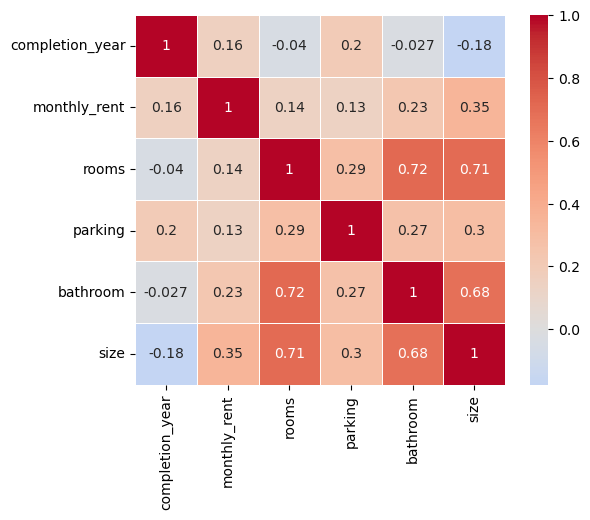

In [66]:
# calculating correlation values and plotting heatmap between pairs of variables
corr = hrp_cont.corr()
sns.heatmap(corr, annot=True, center=0,cmap="coolwarm",square=True, linewidths=.5);

<br>

From the **Pearson correlation heatmap** above, we observed that:


- The number of `rooms` has a strong positive correlation with `size` and `bathroom`.<br>
- The number of `bathroom` has moderate correlation with the `size`.
- There are no high correlated data with the `monthly_rent`.

<br>

<hr>

### 4.2 - Further Investigation

<br> Since we didn't find any high correlation of variables with `monthly_rent`, we will need to investigate the trends in factors as follows: <br>

1. Completion year <br>
2. Property type <br>
3. Unit size, number of rooms & bathrooms<br>
4. Facilities<br>
5. furnished condition<br>
6. City <br>
7. Area

<hr>

#### 4.2.1 - Completion year 

As there are only 41 unique data points correlating average monthly rent to the completion year, we plot out a bar graph to observe and compare the data between years.

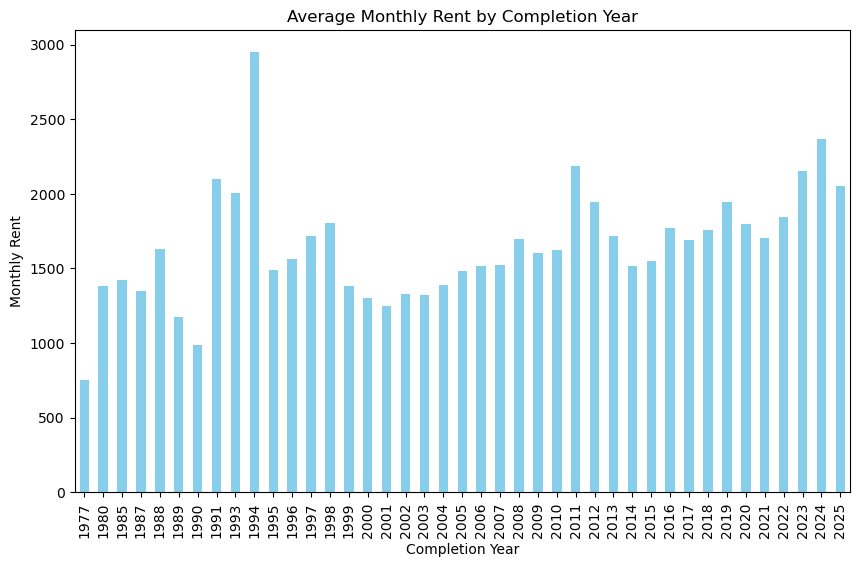

In [67]:
# Group by completion year and calculate the mean rent for each year
rent_by_year = hrp.groupby('completion_year')['monthly_rent'].mean()

# Plot bar chart
plt.figure(figsize=(10, 6))
rent_by_year.plot(kind='bar', color='skyblue')
plt.title("Average Monthly Rent by Completion Year")
plt.xlabel("Completion Year")
plt.ylabel("Monthly Rent");

From the bar graph above, we observed that:
1. **Completion year from `1991` and `1994` had a relatively high rental** 
    - The reason being the success of the `New Economy Policy` by the `National Development Policy (NDP)`, which is a plan initiated by the fourth prime minister of Malaysia, Tun Dr Mahathir, drived the country into its golden era where the country's economy skyrocketed, resulting in the increase affordabality of Malaysians to rent or own a property (Chan et al., 2018).
<br><br>

2. **The monthly rental decrease drastically from year `1998` to year `2003`.**
    - This may be due to the `Asian Financial Crisis` that caused a huge drop in capital flow, thus making the borrowing of funds from bank to decrease, which reflected in a low valuation of property (Chan et al., 2018).
<br><br>

3. **The monthly rental slowly increases until year `2012`.**
    - This shows that the country's economy is `slowly recovering` from the financial crisis.
<br><br>

4. **The monthly rental hits another releatively low peak in `2014`.**
    - In 2014, a major event, known as the "Oil price crisis" occured, causing a decline in crude oil prices. As Malaysia is a country which heavily relies on oil exports, the country's economy was severely impacted, causing deterioation. Hence Malaysians affordability to rent or own a property decreased, reflected on the low monthly rental in this year (Chan et al., 2018).
<br><br>

5. **The monthly rental remains in a normal (not too high or low) increasing rate after year `2014`.**
    - This can be seen as the rental increases along with the `inflation rate` that tend to increase in recent years (Chan et al., 2018).
<br><br>

6. **The monthly rent is noticeably higher in recent years after 2022**
    - Post-pandemic, many tourists, expatriates, and international students are starting to travel into the country again, which may lead to the increasing demand for rental property (Kathy, 2024). Thus, newly completed property which are generally in better condition tend to list for higher prices (Chan et al., 2018). <br><br>

The incident that happened in the timeline above affected the new-built building at that moment, causing changes in the rental price. For example, if that incident caused a drop in housing prices (due to factors including a drop in land prices), the rental price for the new building would start at a relatively low price. With the same increase rate from the timeline until now, compared to other buildings, it would stay at a relatively low level of rental price.

<hr>

#### 4.2.2 - Property type

As there are only several property types that exist in Klang Valley, we decided to plot the data correlated to `property_type` using a **bar graph**.

A bar graph is useful in this context as it allows for a clear comparison of the distribution of different property types in regard to `monthly_rent`.

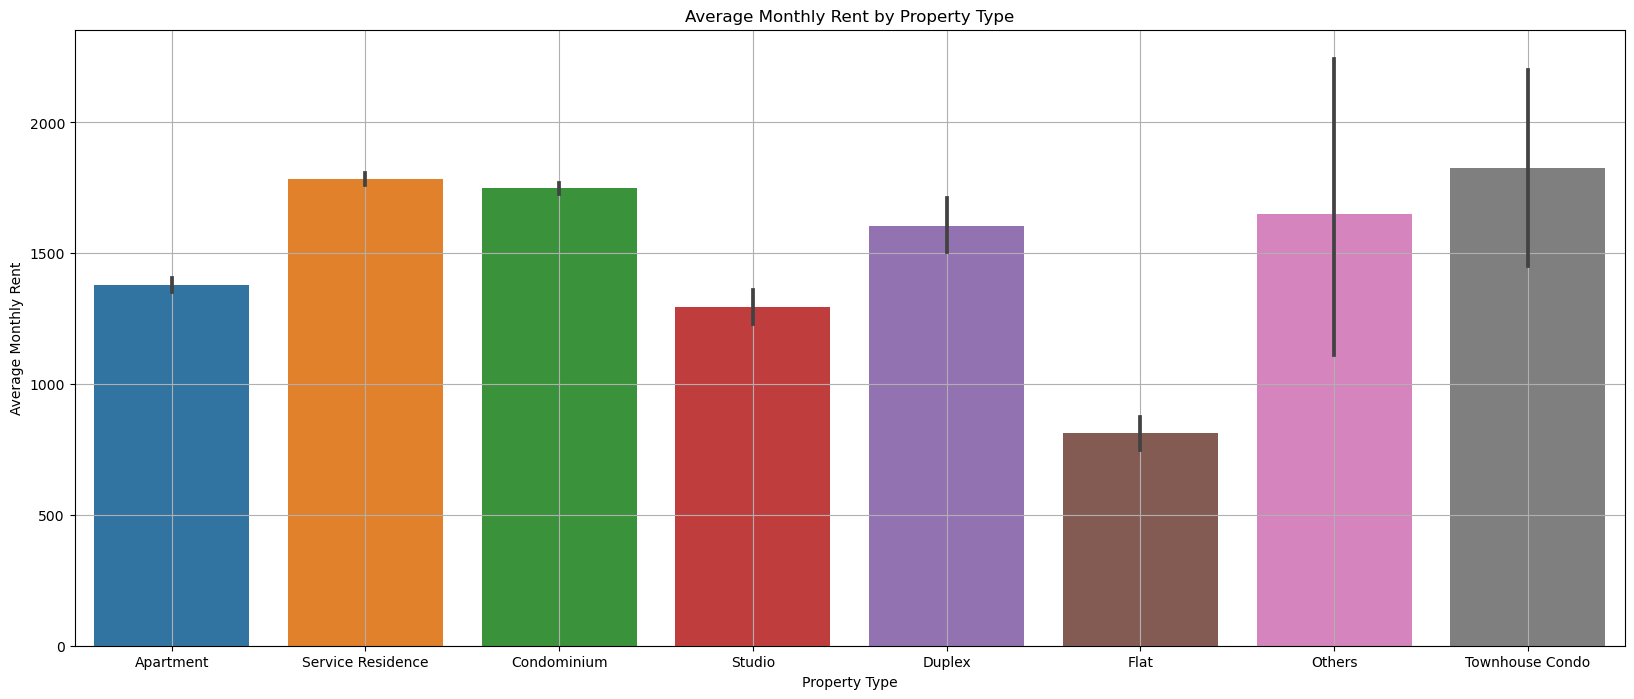

In [68]:
# Plot bar chart
plt.figure(figsize=(20,8))
sns.barplot(data=hrp, x='property_type', y='monthly_rent')
plt.title("Average Monthly Rent by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Average Monthly Rent")
plt.grid(True);

From the bar graph above, we observed that:

- All of the property type has almost same average monthly rent except for `Flat` which has a relative low average monthly rent

- A reason could be that flats normally have *less facilites* and tend to have a *simpler, more outdated furnished conditions*.
<br><br>

We further explored the differences between `property_type` by plotting out a **box plot**.

A box plot helps in data visualitation while highlighting central tendencies, variability and outliers of each category. Multiple box plots enable easier comparison and identifying any differences in characteristics.

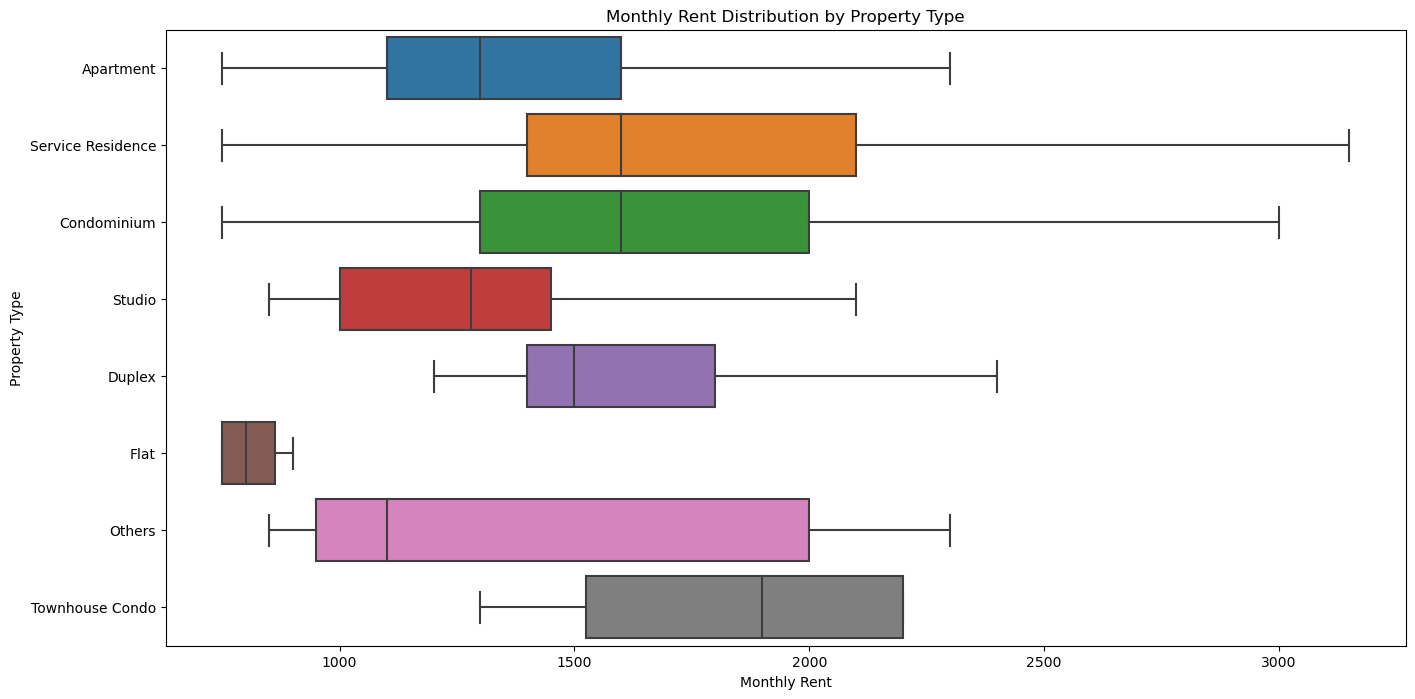

In [69]:
# Plot boxplot
plt.figure(figsize=(16, 8))
sns.boxplot(data=hrp, y='property_type', x='monthly_rent',showfliers=False)
plt.title("Monthly Rent Distribution by Property Type")
plt.ylabel("Property Type")
plt.xlabel("Monthly Rent");

From the box plot above, we can observe that:

1. **`Service Residence` has a higher upper quartile and biggest maximum monthly rental.**
    - This is because service residences tend to have more amenities, such as cleaning and laundary services, as well as luxurious rooms and premimium conveniences which account for higher rental rates.
<br><br>

2. **The interquatile range of `studio` is relatively low, just higher than `flat`.**
    - The reason is because studios normally have a small size and most likely to be rented by only one person, thus shows a small dispered of range of monthly rent.


<hr>

#### 4.2.3 - Furnished condition

Similarly, since the variable `furnished_condition` is a discrete data type, and it contains several types, we decided to use a **box plot**.

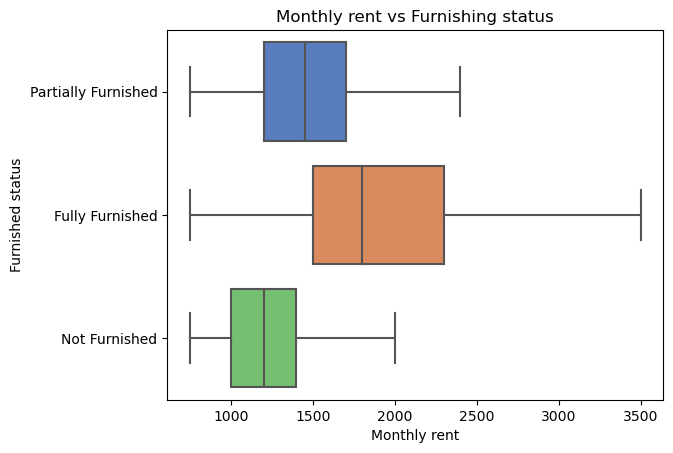

In [70]:
# box plot between monthly rent and furnishing status
sns.boxplot(data=hrp, y="furnished", x="monthly_rent", showfliers=False, palette="muted")
plt.ylabel("Furnished status")
plt.xlabel("Monthly rent")
plt.title("Monthly rent vs Furnishing status");

From the graph above, we noticed a clear trend:
** As the degree of furnishing increases, the overall `monthly_rent` increases.**<br>
- This aligns with our expectations, that as there are more furnishings in the house, the rent increases. This could be due to a number of reasons, mainly one being that it is a convenience to renters as they don't need to purchase furniture and appliances in the long run and can reuse the same furnihsings for future renters. Another reason is the obvious convenience that comes to the renters, who also don't need to additionally purchase appliances for the house.

<br>
<hr>

#### 4.2.4 - Facilities

Taking into account the number of facilities of each rental property and its monthly rent, we observed the trend of `monthly_rent` with respect to the numbers of facilities (`facilities_num`)

In [71]:
hrp['facilities_num'] = hrp['facilities'].apply(lambda x: len(x))

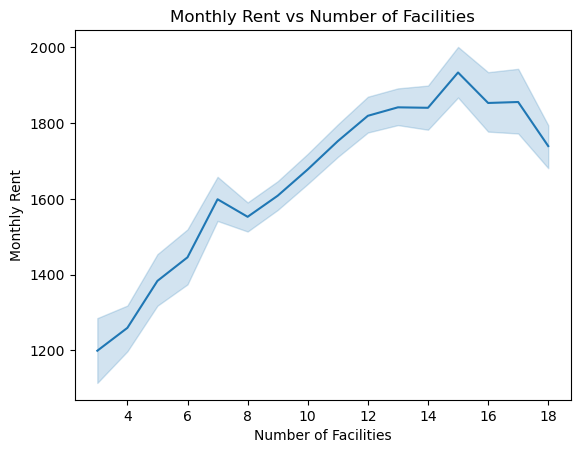

In [72]:
# Filtering out outliers in facilities_num
hrp = hrp[hrp['facilities_num'].between(hrp['facilities_num'].quantile(0.01), hrp['facilities_num'].quantile(0.99))]

# Plotting a line plot for monthly rent vs number of facilities
sns.lineplot(data=hrp, x='facilities_num', y='monthly_rent')

plt.title('Monthly Rent vs Number of Facilities')
plt.xlabel('Number of Facilities')
plt.ylabel('Monthly Rent');

From the graph above, we observed that:
**`monthly_rent` increases as `number of facilities` increases until unit rentals with 14 facilities. Beyond this point, the `monthly_rent` decreases as `number of facilities` increases.** <br>
- This may be due to a majority of properties with more than 14 facilities being located in suburban areas (Cyberjaya, etc.), which are far away from higher-ranked schools and universities, well-paying job opportunities, recreational outlets, as well as popular shopping malls. 
- They are also often located at the end of MRT/LRT lines, so it takes a lot of time to travel to these places. 
- In those areas, any job oppurtunities are usually either government jobs or of small companies, thus the pay is not very high. 
- Therefore, even though the properties provide more facilities, the demand is low because the property location is too far from the city, and the residents who work in those locations (the target market) cannot afford a high rent, so as a result the rent is lower.

To further explore the influence of facilities on monthly rent, we decided to look into another question: What are the differences between rooms that are near to KTM/LRT (public transport) and those that are not?

We decided to plot a box plot to see the difference between them and help answer our question.

In [73]:
hrp["near_to_pb"] = hrp["facilities"].apply(lambda x: "Yes" if "Near KTM/LRT" in x else "No")

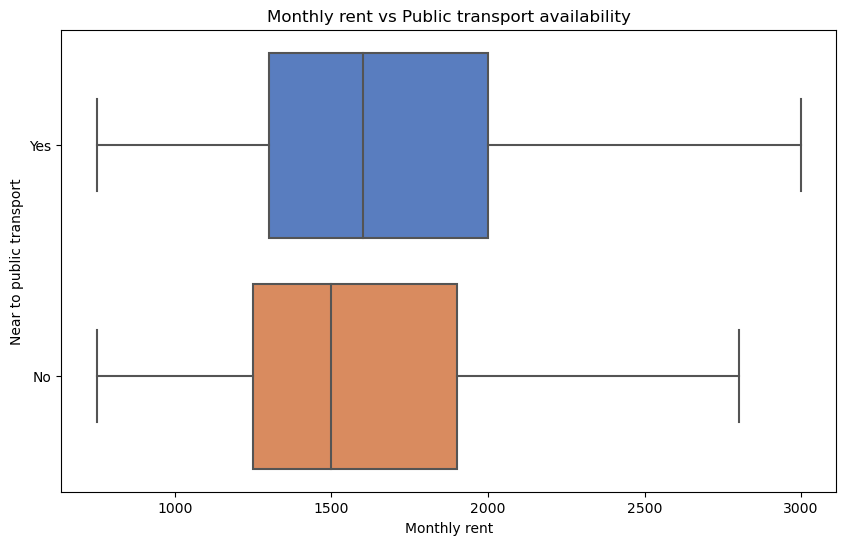

In [74]:
# box plot 
plt.figure(figsize=(10, 6))
sns.boxplot(data=hrp, y="near_to_pb", x="monthly_rent", showfliers=False, palette="muted")
plt.ylabel("Near to public transport")
plt.xlabel("Monthly rent")
plt.title("Monthly rent vs Public transport availability");

From the graph above, we observed that:<br>

**The overall `monthly_rent` is higher for units that available with KTM/LRT.**<br>
- This observation suggests that proximity to public transportation plays a crucial role in determining rental rates. 
- This is because such properties offer greater accessibility and convenience, driving up demand.
- Additionally, higher connectivity allows easy access to ammenities without a car.

<hr>

#### 4.2.5 - Unit size, Number of rooms & bathrooms, and parking

For this subsection, we break it down further by looking at each category one at a time, starting with the unit size.

<br> As there are numerous sizes to consider, we decided to plot them in a **histogram** to categorise them into groups, and further .

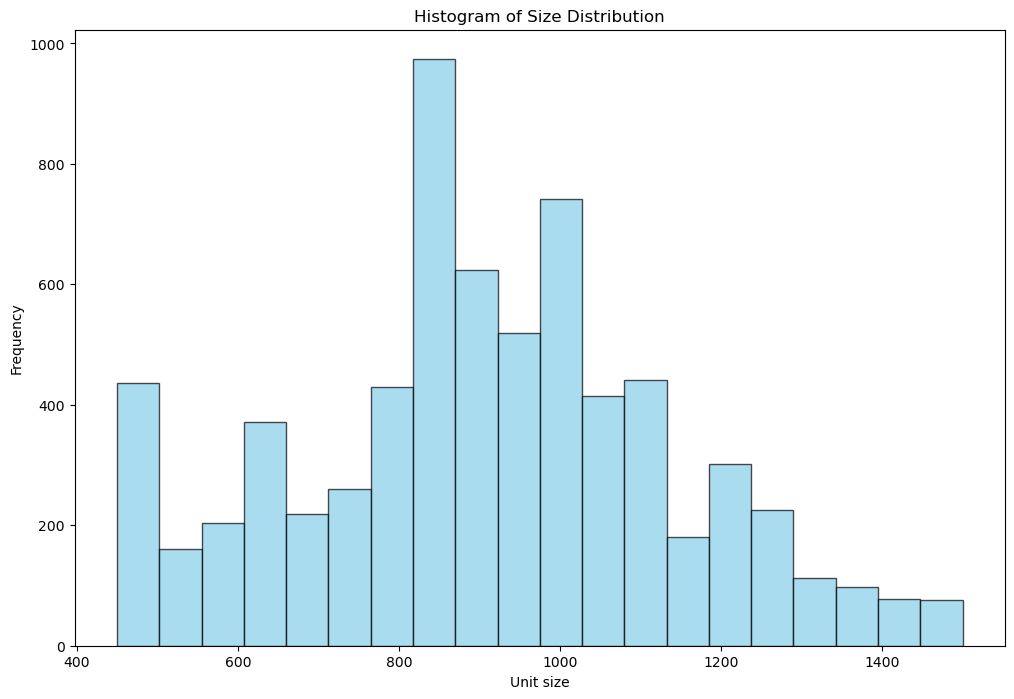

In [75]:
# plotting histogram of unit size
plt.figure(figsize=(12, 8))
plt.hist(hrp['size'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Unit size')
plt.ylabel('Frequency')
plt.title('Histogram of Size Distribution');

From the histogram above, we observed that:<br>

**The relationship between `size` showed a bell-curved shape in histogram** 
- This fulfills the uniform distribution of data.
- Which means that the sizes of units in our dataset are distributed in a balanced manner.
- This has also proven that most of the residents in Klang Valley would rather choose a property with a unit size in the range of 800 to 1100.
<br><br>


To observe the relationship between `monthly_rent` and `size`, we created a **scatterplot**.

Scatter plots show relationships between two numeric variables. The dots on the graph not only show us individual data points but also the patterns when the graph is taken as a whole, thus enabling us to identify patterns easily.

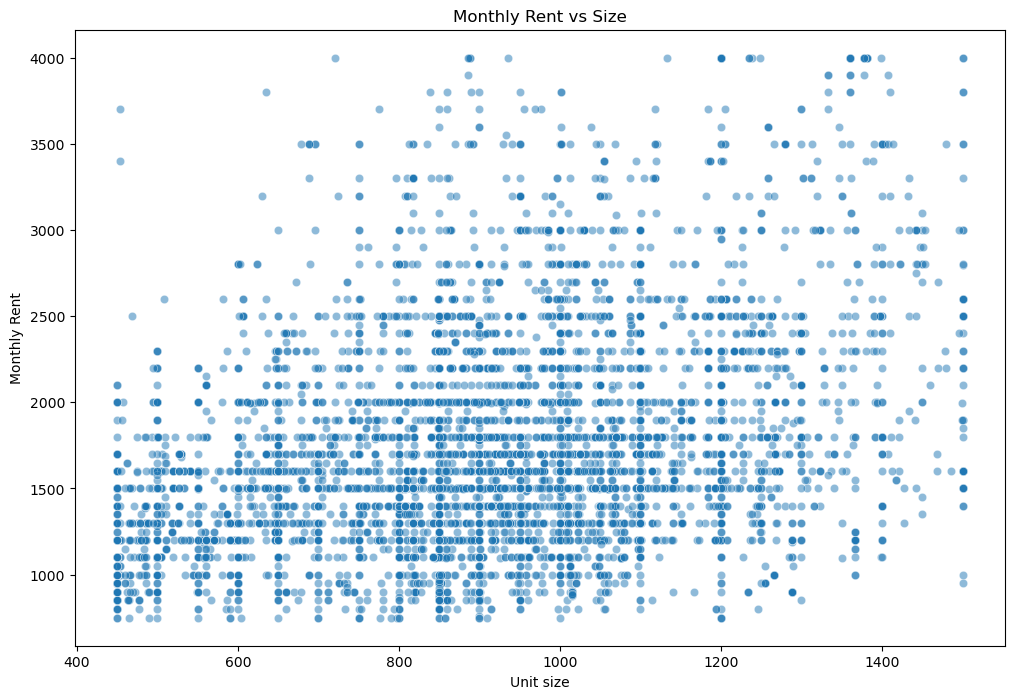

In [76]:
# Plotting a scatter plot for monthly rent vs unit size
plt.figure(figsize=(12, 8))
sns.scatterplot(data=hrp, x='size', y='monthly_rent', alpha=0.5)

plt.title('Monthly Rent vs Size')
plt.xlabel('Unit size')
plt.ylabel('Monthly Rent');


From the scatter plot above, we observed that:<br>

1. **The plot is scattered and distributed in a uniform manner.** 
    - This has proven the explanation in the previous part is correct, in which our dataset is distributed in a balanced manner.<br><br>


2. **Moreoever, we can still see a very weak increasing trend with respect to `size`** 
    - This is because the increase in unit size comes with more comfort and space, which can result in a higher monthly rent.
    - The cost is directly correlated to factors including the price of the land, etc.
    
<br>

Then, we continue with investigation in the factor of `rooms`.

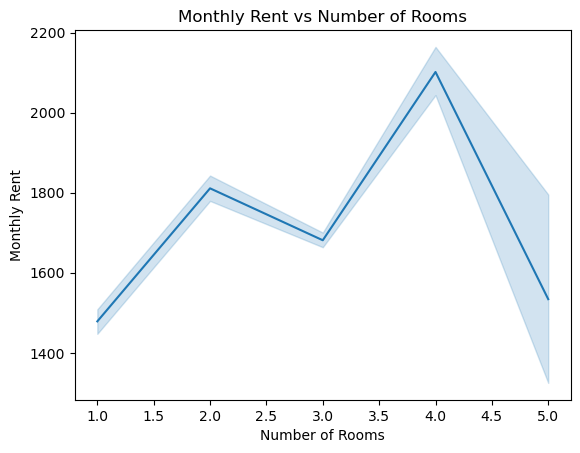

In [77]:
# Plotting a line plot for monthly rent vs number of rooms
sns.lineplot(data=hrp, x='rooms', y='monthly_rent')
plt.title('Monthly Rent vs Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Monthly Rent');

From the line plot above, we observed that:
1. **Monthly rent increases for 1 rooms until 2 rooms, but decreased when it is 3 rooms.**
    -  This may be because the demand for 3 rooms is lower than for 2 rooms in the Klang Valley marketplace.<br><br>
    
2. **The graph continues to increase from 3 rooms to 4 rooms, but drop when it is 5 rooms.**
     - This may be because as the number of rooms increases, the average square footage per room may decrease, resulting in smaller rooms, which may be unfavourable to most renters. 
     
<br>

Next, we continue with investigation in the factor of `bathroom`.

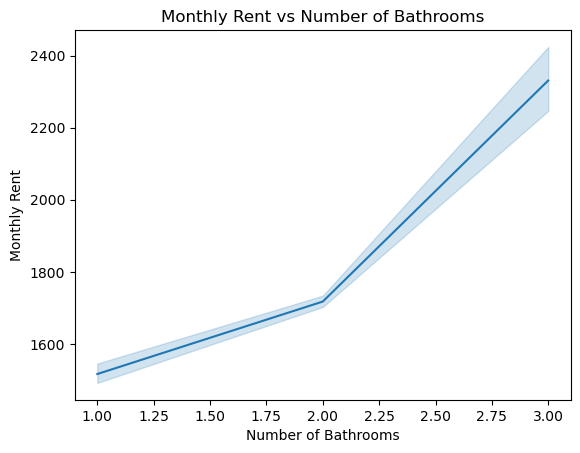

In [78]:
# Plotting a line plot for monthly rent vs number of bathrooms
sns.lineplot(data=hrp, x='bathroom', y='monthly_rent')
plt.title('Monthly Rent vs Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Monthly Rent');

From the line plot above, we observed that:<br>

**There is a increasing trend in `monthly_rent` with respect to `bathrooms`**
-  This may be because additional bathrooms offer tenants more convinience and comfort, especially in shared living conditions or larger families which is common in Malaysia. Since majority of the Malaysian families would prefer to live comfortably, there would be a higher demand for houses with more bathroom, hence the higher rent. <br>
    

Next, we look at monthly rent and the number of parking

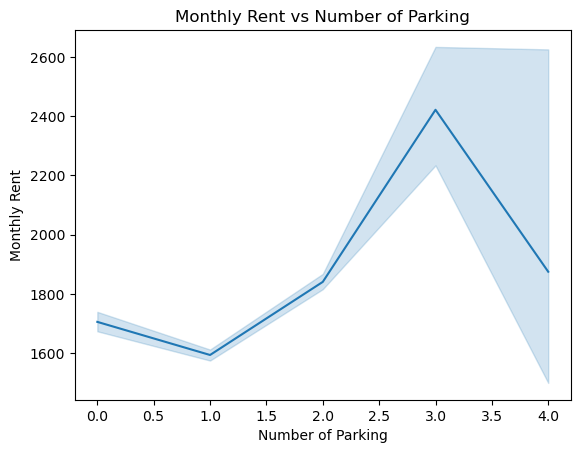

In [79]:
# Plotting a line plot for monthly rent vs number of parking
sns.lineplot(data=hrp, x='parking', y='monthly_rent')
plt.title('Monthly Rent vs Number of Parking')
plt.xlabel('Number of Parking')
plt.ylabel('Monthly Rent');

We could observe a similar situation for `parking`, but for unit with more than 4 parkings, a down trend observed. This may be due to limited demand for units with more than 4 parking spaces.

<hr>

#### 4.2.6 - City
We continue our investigation in the factor of `city`.<br><br>
First, we filter out the required data, which are `monthly_rent` and `city`.<br><br>

In [80]:
geo = hrp[["monthly_rent", "city"]]

Considering that there are only 2 cities available here, which are Selangor and Kuala Lumpur, we do initial analysis by listing out the main quantitative data (mean, iqr etc).

In [81]:
geo.describe().astype(int)

,monthly_rent
count,6863
mean,1706
std,597
min,750
25%,1300
50%,1600
75%,2000
max,4000


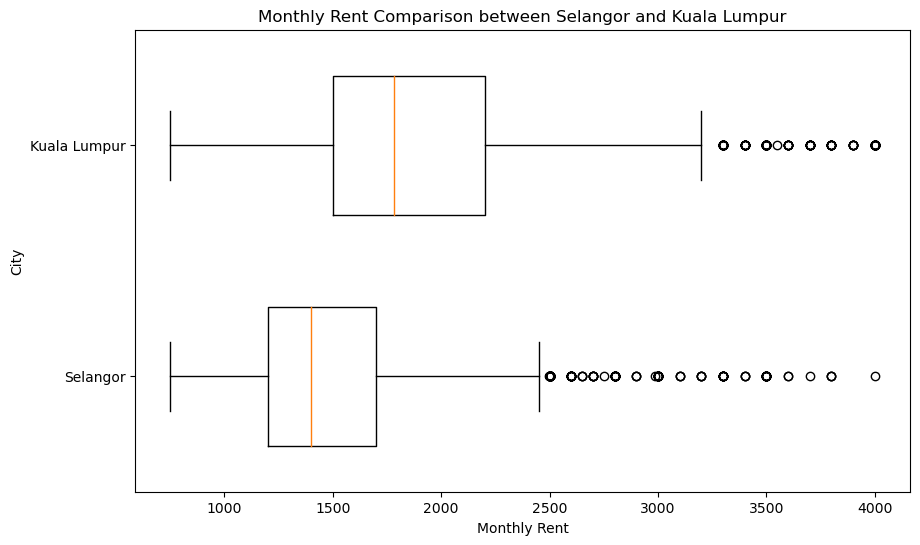

In [82]:
selangor_data = geo[geo["city"] == "Selangor"]
kl_data = geo[geo["city"] == "Kuala Lumpur"]
# Concatenate the filtered dataframes
combined_data = pd.concat([selangor_data, kl_data])

plt.figure(figsize=(10, 6))
plt.boxplot([selangor_data['monthly_rent'], kl_data['monthly_rent']], labels=['Selangor', 'Kuala Lumpur'], widths=0.6, vert = False)
plt.xlabel('Monthly Rent')
plt.ylabel('City')
plt.title('Monthly Rent Comparison between Selangor and Kuala Lumpur');

By looking at both box plot that describes the data, we can make a simple conclusion that:

Culmulatively, with a nearly same size of data, 

1. Monthly Rent in KL is higher than Selangor  
   - Mean,
   - Standard deviation,
   - Min,
   - 25% percentile,
   - 50% percentile,
   - 75% percentile, and
   - the maximum rental fee
   
<br>
2. Distribution of `monthly_rent` in KL is wider than Selangor

<br>
3. However, it is observed that both data about KL and Selangor are negatively-skewed.

<br>

**Why?**

We think that it is because KL is the capital of Malaysia. Thus, undoubtfully, the rental price in KL is relatively higher than Selangor.<br><br>However, we cannot draw a full stop for our conclusion here as there are more potential factors that could show us a correlation.

<hr>

#### 4.2.7 - Area

What if we further delve into the data by examining the distances from the capital, considering that we mentioned KL has higher rents than Selangor?  <br>Note that since there are many areas available, we will only consider the top 10 and bottom 10.<br>

In [85]:
top_10_areas = hrp.groupby('area')['monthly_rent'].mean().nlargest(10).index
bottom_10_areas = hrp.groupby('area')['monthly_rent'].mean().nsmallest(10).index

top_10_data = hrp[hrp['area'].isin(top_10_areas)]
bottom_10_data = hrp[hrp['area'].isin(bottom_10_areas)]

top_mean_rent = top_10_data.groupby('area')['monthly_rent'].mean()
bottom_mean_rent = bottom_10_data.groupby('area')['monthly_rent'].mean()

x_limit = (0, 4000)

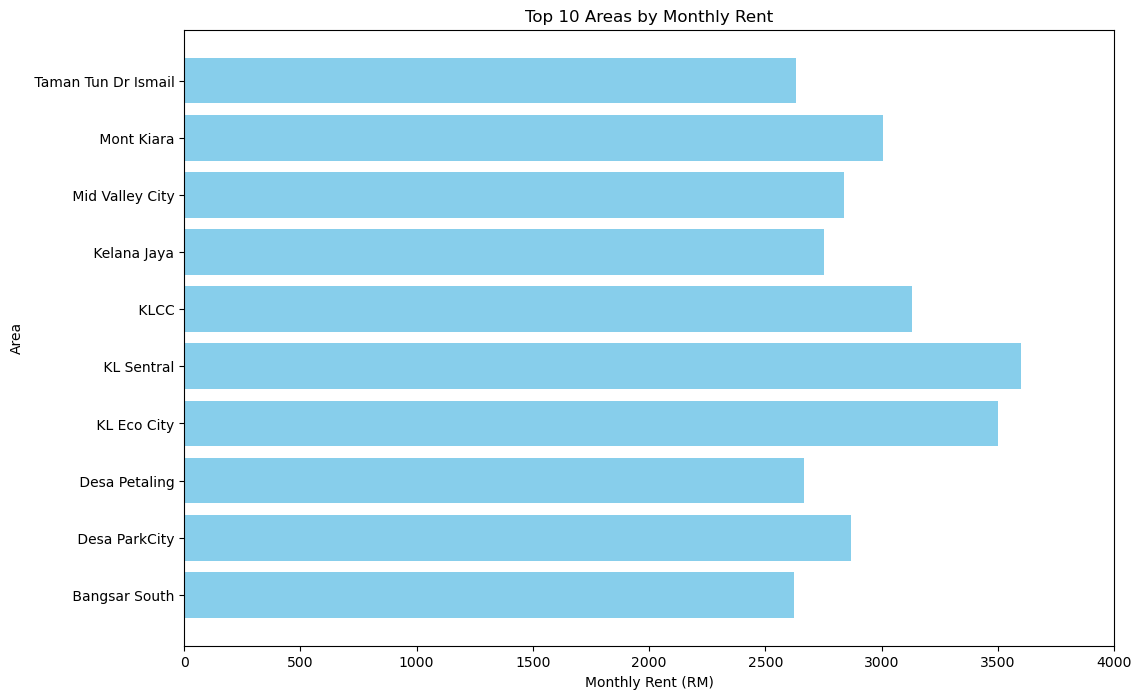

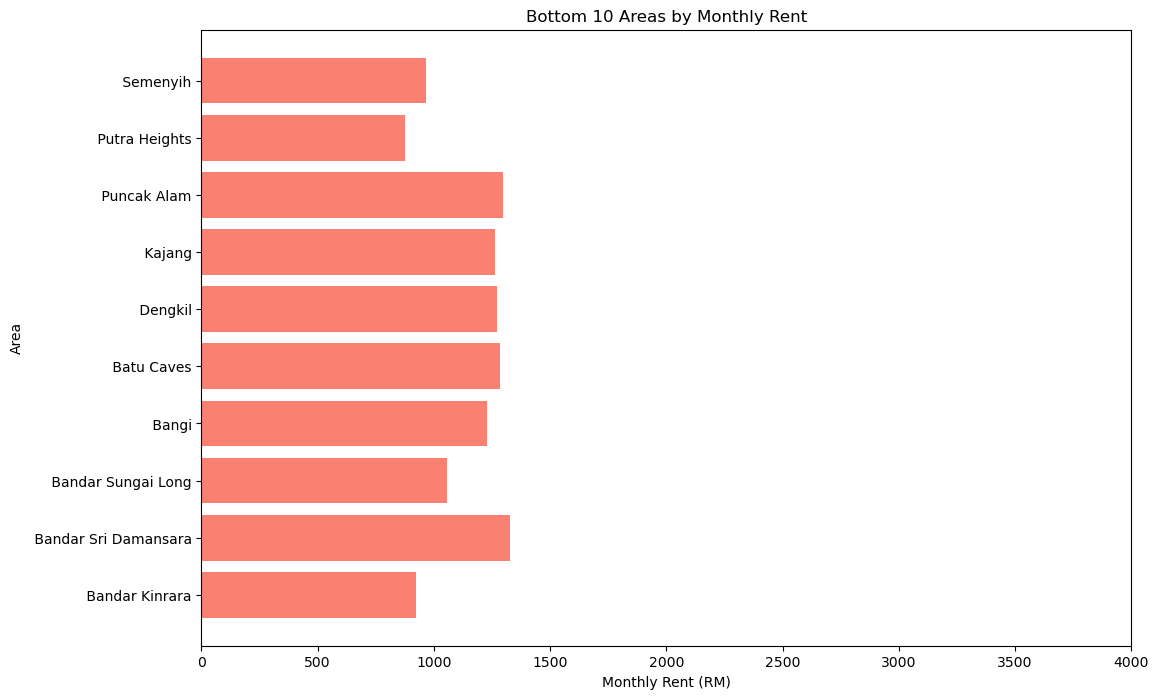

In [86]:
# Plotting bar plot for top 10 areas
plt.figure(figsize=(12, 8))
plt.barh(top_mean_rent.index, top_mean_rent.values, color='skyblue')
plt.xlabel('Monthly Rent (RM)')
plt.xlim(x_limit)
plt.ylabel('Area')
plt.title('Top 10 Areas by Monthly Rent')
#plt.gca().invert_yaxis()  # Invert y-axis to display top areas at the top
plt.show()

# Plotting bar plot for bottom 10 areas
plt.figure(figsize=(12, 8))
plt.barh(bottom_mean_rent.index, bottom_mean_rent.values, color='salmon')
plt.xlabel('Monthly Rent (RM)')
plt.xlim(x_limit)
plt.ylabel('Area')
plt.title('Bottom 10 Areas by Monthly Rent');

#plt.gca().invert_yaxis()  # Invert y-axis to display top areas at the top


Note that:
1. All top 10 areas are from Kuala Lumpur, and all bottom 10 areas are from Selangor.
2. This has proven that the analysis for `city` is valid. <br><br>

We could extend the area data not only to include geographical specifications like address and district but also to incorporate longitude and latitude coordinates, by using `Nominatim` from `geopy` module.<br> *Initially, we intended to use `GoogleV3`, but the API requires a subscription.* <br><br>
Since `distance` is a continuous data, with desired data type of `float`, we questioned:<br>

**What data are we collecting to let it continuous?**<br>A floating question appeared.<br> 
- Longitude
- Latitude


In [87]:
geolocator = Nominatim(user_agent="my_geocoder")
locate = lambda city: geolocator.geocode(city)

#Example on how the geocode (or locate function defined here) is called
kl_location = locate("Kuala Lumpur, Malaysia")
print(f"For example,\nHere shows the coordinate of KL: {(kl_location.latitude, kl_location.longitude)}")

For example,
Here shows the coordinate of KL: (3.1516964, 101.6942371)


Using similar approach, we could locate ALL data from the dataset to get the coordinate.

In [88]:
coordinates = {}

address_list, area_list, city_list = (hrp['prop_name']).tolist(), (hrp['area']).tolist(), (hrp['city']).tolist()

In [89]:
lat_range = (2.719,3.861)
lon_range = (100.784, 101.978)
key = 0
API_keys = ["663f3753aa712717761030uqd81f772", "663f69bf3c65f768767213apy965ac4", "663f6ac210b08954935686jtk50fdb4", "663f6badf2a90138595440deb37fdb1", "my_geocoder"]

def search_coor(address: str, key):
    key +=1
    geolocator = Nominatim(user_agent= API_keys[len(API_keys)%key])
    loc = geolocator.geocode(address)
    if not loc:
        return None
    return (loc.latitude, loc.longitude)

def coor_valid(coordinate):
    if coor:
        if lat_range[0] <= coor[0] <= lat_range[1]:
            if lon_range[0] <= coor[1] <= lon_range[1]:
                return True
    return False

**Explanation on how the cell below works**
1. The cell is running a for loop going through the whole property name of the dataset.
2. Then, the prop_name is used to find the exact location via service from geocoder.


In [91]:
lat_ref = []
lon_ref = []
for i in range(len(address_list)):
    if area_list[i] not in coordinates.keys():
        coor = search_coor(area_list[i], key)
        if not coor_valid(coor): 
            coor = search_coor(city_list[i], key)
        coordinates[area_list[i]] = coor
    lat_ref.append(coordinates[area_list[i]][0])
    lon_ref.append(coordinates[area_list[i]][1])
    time.sleep(2/(i+1)) 
    # the line above exist as there are time limit per second for the access

In [92]:
hrp['latitude'] = lat_ref
hrp['longitude'] = lon_ref

We now have the coordinates! Next, what distance should we measure to? Let's try Kuala Lumpur.

In [93]:
kl_location = locate("Kuala Lumpur, Malaysia")
#Finding geodesic distance
hrp["distance_to_capital"] = hrp.apply(lambda row: geodesic((row["latitude"], row["longitude"]), (kl_location.latitude, kl_location.longitude)).km, axis=1)

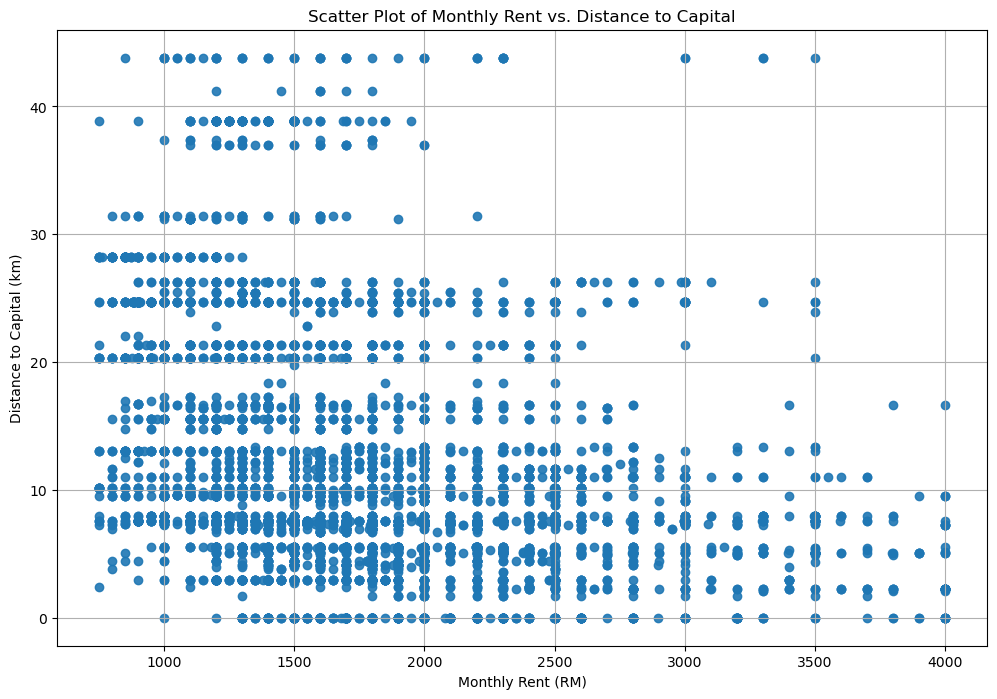

In [94]:
# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(hrp["monthly_rent"], hrp["distance_to_capital"], alpha=0.9)  # observed data
plt.grid(True)
plt.title("Scatter Plot of Monthly Rent vs. Distance to Capital")
plt.xlabel('Monthly Rent (RM)')
plt.ylabel('Distance to Capital (km)');


The graph appears to be unreasonable! We need to investigate why this is the case, based on the x-y values.

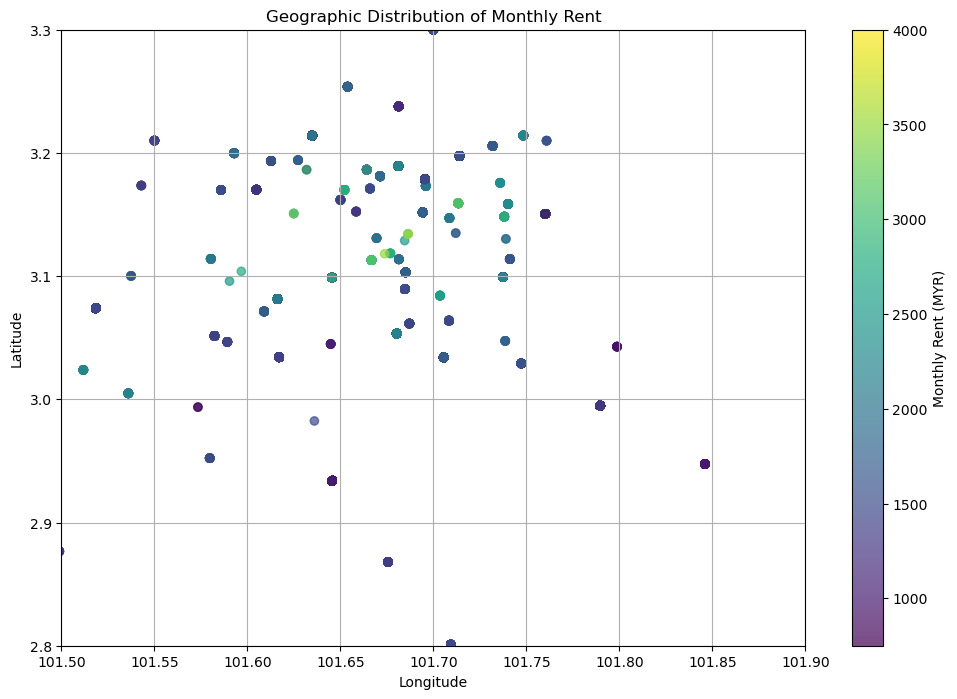

In [95]:
plt.figure(figsize=(12, 8))
plt.grid(True)
plt.scatter( hrp["longitude"], hrp["latitude"], c=hrp["monthly_rent"], alpha=0.7)
plt.colorbar(label='Monthly Rent (MYR)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(101.5, 101.9) 
plt.ylim(2.8, 3.3)
plt.title('Geographic Distribution of Monthly Rent');

From the graph above, we do see some relation in how the `monthly_rent` is distributed, specifically in **clusters**. Thus, we make use of Gaussian Mixture Model (GMM), which is a probabilistic model that could be used for clustering. 
<br><br>
**Why GMM but not others?**
<br><br>
We chose GMM over other clustering algorithms for several reasons. Firstly, GMM can handle complex data distributions. While k-means assumes spherical clusters and K Nearest Neighbors (KNN) is effective only for simple clustering tasks, GMM allows for soft clustering, where a data point can belong to multiple clusters. This is particularly useful in our context.
<br><br>
These properties are important in Klang Valley because sometimes a spot can belong to two cities. For example, the Subang Jaya area contains places that belong to both Petaling Jaya and Subang Jaya.

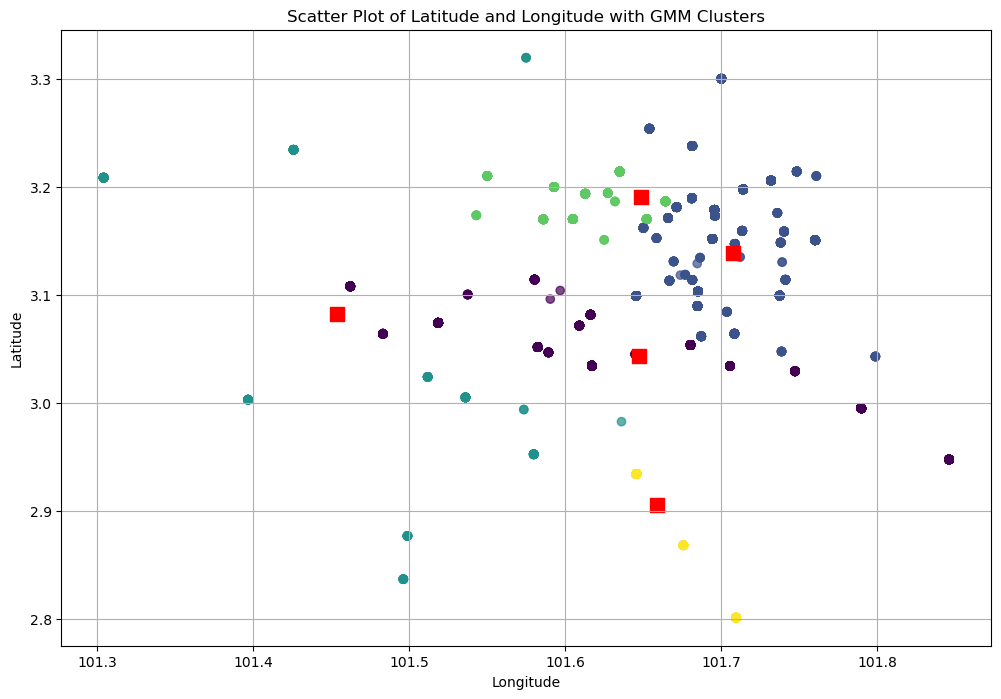

In [96]:
cluster_num = 5
gmm = GaussianMixture(n_components=cluster_num)  # Number of clusters
gmm.fit(hrp[['latitude', 'longitude']])  # Fit GMM to latitude and longitude data

# Scatter plot of latitude and longitude with GMM clusters
plt.figure(figsize=(12, 8))
plt.scatter(hrp["longitude"], hrp["latitude"], c=gmm.predict(hrp[['latitude', 'longitude']]), alpha=0.7)
plt.scatter(gmm.means_[:, 1], gmm.means_[:, 0], c='r', marker='s', s=100)  # Plot GMM cluster centers
plt.grid(True)
plt.title("Scatter Plot of Latitude and Longitude with GMM Clusters")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


We could thus find the specific area name for the centre of each cluster.

In [97]:
def find_centre_name(latitude, longitude):
    try:
        centre_name = geolocator.reverse((latitude, longitude)).raw["address"]["city"]
    except KeyError:
        centre_name = geolocator.reverse((latitude, longitude)).raw["address"]["district"]
    return centre_name

centre_dict = {}
centers = gmm.means_
for i, centre in enumerate(centers):
    centre_dict[i] = {
        "centre_name" : find_centre_name(centre[0], centre[1]),
        "latitude" : centre[0],
        "longitude" : centre[1]
    }

for cluster, ref in centre_dict.items():
    print(f"Centre of cluster {cluster}: {ref['centre_name']}")

Centre of cluster 0: Subang Jaya
Centre of cluster 1: Kuala Lumpur
Centre of cluster 2: Bandaraya Klang
Centre of cluster 3: Kuala Lumpur
Centre of cluster 4: Sepang


In [98]:
# deriving the distance to centre for each row
hrp["relative_cluster"] = gmm.predict(hrp[['latitude', 'longitude']])

hrp["relative_centre_lat"] = hrp["relative_cluster"].map(lambda x: centre_dict[x]['latitude'])
hrp["relative_centre_lon"] = hrp["relative_cluster"].map(lambda x: centre_dict[x]['longitude'])

hrp["distance_to_centre"] = hrp.apply(lambda row: geodesic((row["latitude"], row["longitude"]), (row["relative_centre_lat"], row["relative_centre_lon"])).km, axis=1)

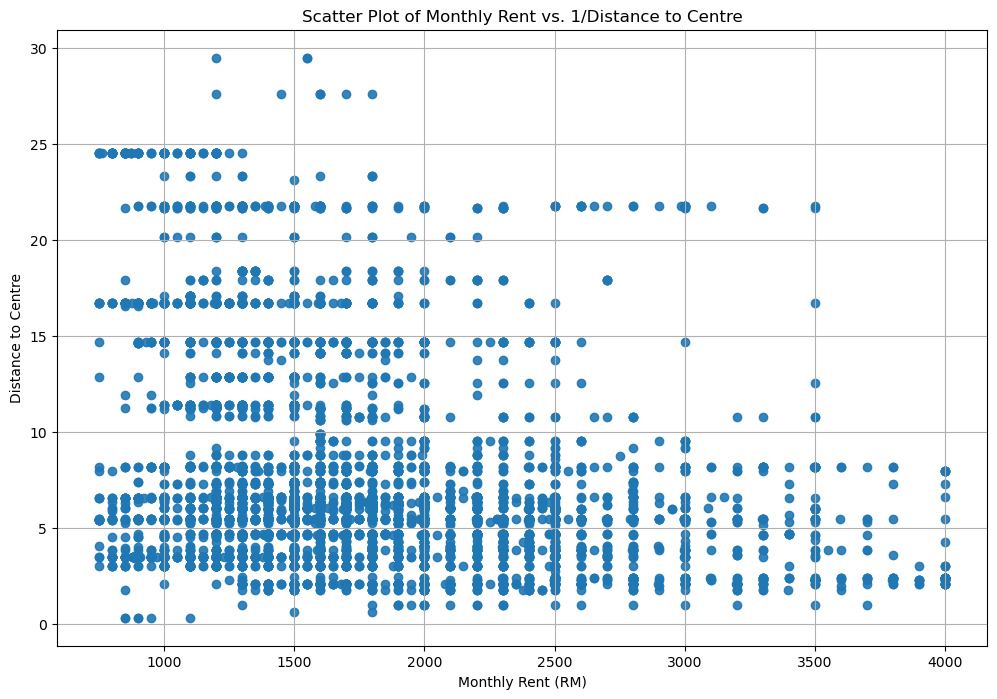

In [99]:
# Scatter plot of monthly rent vs. distance to center
plt.figure(figsize=(12, 8))
plt.scatter(hrp["monthly_rent"], hrp["distance_to_centre"], alpha=0.9)
plt.grid(True)
plt.title("Scatter Plot of Monthly Rent vs. 1/Distance to Centre")
plt.xlabel('Monthly Rent (RM)')
plt.ylabel('Distance to Centre');

Observation:
1. Room with lower price of monthly rent (< RM1000) exist frequently for `distance_to_centre` of various range frequently.<br>
2. Room with moderate price of monthly rent (> RM1000, < 3000) exist frequently for `each distance_to_centre` from 0 to 25 km frequently, but total number of room at this price range is less than (1).<br>
3. Room with higher price of monthly rent (> RM3000) exist frequently for `distance_to_centre` from 0 to 10 km frequently, but total number of room at this price range is less than (2).<br>

<br>
4. This shows that room with lower price range gains higher popularity in Klang Valley, but normally exist at various distance from the centre. <br>
5. While for room with higher price range, it exist at most-populated place, i.e., Subang Jaya, Ampang Jaya etc.


We could visualise how each of the cluster appears, by using heat map from `folium` module.

In [100]:
# Create a base map centered around Kuala Lumpur
map_heat = folium.Map(location=[3.139, 101.686], zoom_start=11)

# Extract latitude and longitude coordinates
heat_data = hrp[["latitude", "longitude"]].values.tolist()

# Add a heat map layer
HeatMap(heat_data).add_to(map_heat)

# Display the map
map_heat


We could also show each cluster, accurately by showing each cluster.

**Limitations**
1. Unfortunately, due to limited size of usable data, this sub-section is unable to produce accurate high correlation coefficient, for either polynomial or linear.
2. Limitation on API keys preventing from gaining of accurate data for each of the exact places.

In [101]:
#remove unnecessary data
for column in ["relative_cluster", "relative_centre_lat", "relative_centre_lon"]:
    hrp = hrp.drop(columns = column)

<br>

## Section 5: Evaluation & Modelling
<hr style="height: 1px; background-color: #ccc">


From the previous manipulation, we can once again reevaluate our **Pearson Correlation** as below, via heat map:

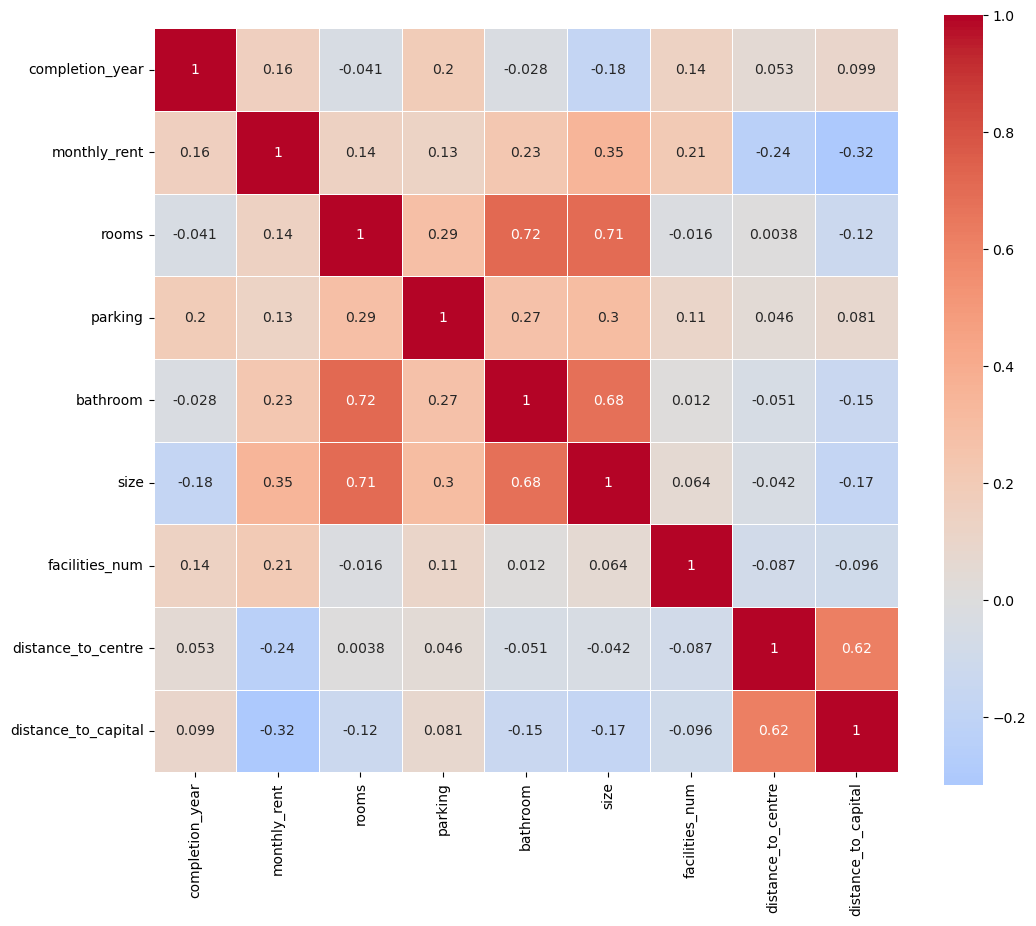

In [102]:
# subsetting the continuous variables from the data
# add more continuous data to the existing subset of continuous data
plt.figure(figsize=(12, 10))
hrp_cont = hrp[['completion_year','monthly_rent','rooms','parking','bathroom','size', "facilities_num", "distance_to_centre", "distance_to_capital"]]

# calculating correlation values and plotting heatmap between pairs of variables
corr = hrp_cont.corr()
sns.heatmap(corr, annot=True, center=0, square=True,cmap="coolwarm", linewidths=.5);

In order to answer our 4 questions mentioned in the Section 2, we require 2 models:
- A model that could specify the monthly rent, based on the specific requirement of the room/ unit, and also 
- A model that is able to predict the trend of monthly_rent in the future.
<br><br>

Thus,  we perform regression analysis, which includes multiple linear regression analysis, linear regression analysis, polynomial regression analysis, and also random forest regression model.<br><br>

### 5.1 Multiple Linear Regression Model of Monthly Rent and Completion Year

By using multiple linear regression analysis, we can obtain the following results: <br><br>

$$ E(X) = r_1 X_{1} + r_2 X_{2} + \cdots + r_n X_{n} + c $$

<br> that: <br>
1. **c** is the constant of the line (intercept of the multiple linear regression analysis)
2. **x<sub>n</sub>** is the variables
2. **r<sub>n</sub>** is the constant coefficient for each variable


**Note that we have done the linear regression in the heatmap above, so we only focus on coming out with a multiple dimensional linear regression model.**

Thus, evaluating from the data above,

In [103]:
# Step 1: prepare data
X = hrp[['completion_year','rooms','parking','bathroom','size', "facilities_num", "distance_to_centre"]]

y = hrp["monthly_rent"]

# Step 2: split data into training and testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=13)

# Step 3: instantatiate them
linear = LinearRegression(fit_intercept=True) # instantatiate the linear regression model
linear.fit(X_train,y_train) # fit the data to the model


mse = np.round(linear.coef_, 14)
li = np.round(linear.intercept_,3)
print("Mean Squared Error:",mse)
print("Intercept is:", li )

training_score = linear.score(X_train,y_train) # calculate rsq for the training set

preds_linear = linear.predict(X_test) 

rsquared_linear = r2_score(y_test,preds_linear) 


print("Training score is",np.round(training_score, 3))
print("Testing score is",np.round(rsquared_linear, 3))



Mean Squared Error: [  20.88937162 -168.26141233  -11.36646868   91.79591181    1.25201616
   21.13647959  -24.67544438]
Intercept is: -41300.075
Training score is 0.266
Testing score is 0.263


The best fit hyperplane is then:<br><br>

$$ {E(X)} = 20.91x_1 + -170x_2 -14.63x_3 +122.71x_4 +1.24x_5 +21.40x_6 +-19.57x_7 -41431.6 $$ <br>


where:<br>

$x_1$: completion_year <br>
$x_2$: rooms <br>
$x_3$: parking <br>
$x_4$: bathroom <br>
$x_5$: size  <br>
$x_6$: facilities_num  <br>
$x_7$: distance_to_centre <br>
$E(X)$: expected monthly rent for that specific type of room  <br><br>


This means:<br>
- For a one ringgit increase in monthly rent, the expected change in the monthly rent is influenced by the coefficients of each variable. 
- For example, for a one-unit increase in the completion year ($x_1$), the expected monthly rent increases by RM 20.91, while a one-unit increase in the number of rooms ($x_2$) decreases the expected monthly rent by RM 170.


Then, testing the result using F-test,

In [104]:
# Perform F-test
f_test = f_regression(X_train, y_train)

# Extract p-values from the F-test results
p_values = f_test[1]

# Check if any of the p-values are less than the significance level (e.g., 0.05)
significant_features = [X_train.columns[i] for i, p_value in enumerate(p_values) if p_value < 0.5]

print("Significant features based on F-test:", significant_features)


Significant features based on F-test: ['completion_year', 'rooms', 'parking', 'bathroom', 'size', 'facilities_num', 'distance_to_centre']


This indicates that all features are deemed significant towards the `monthly_rent`.

### 5.2 Linear Regression Model of Monthly Rent and Completion Year

First, plot a scatter plot of monthly rent and the completion year to observe the trend of data.

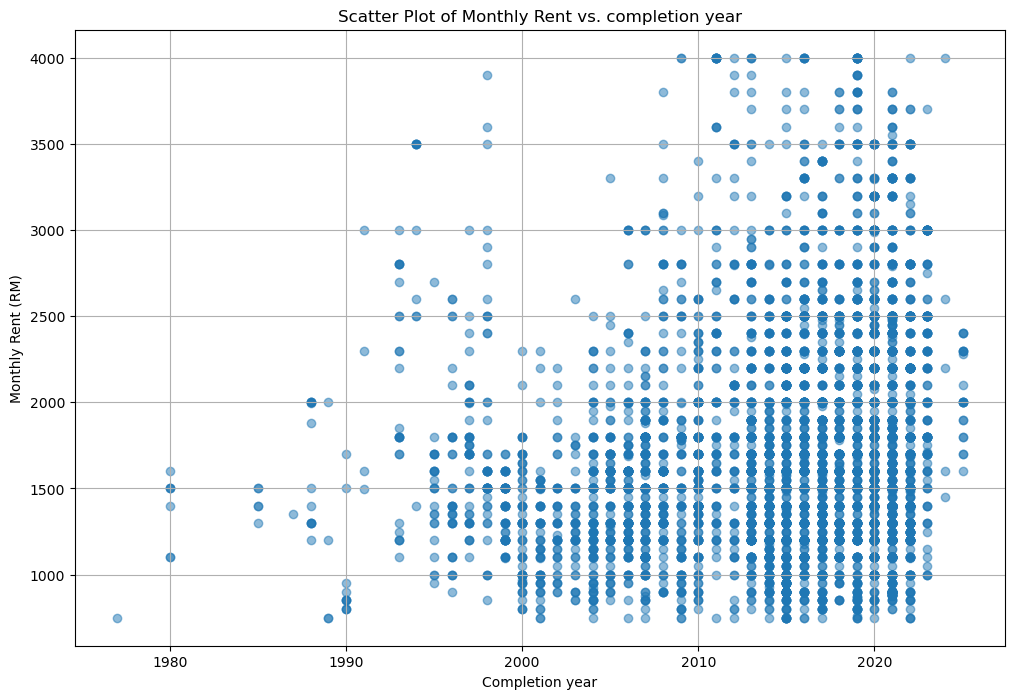

In [134]:
# Scatter plot of monthly rent vs. completion year
plt.figure(figsize=(12, 8))
plt.scatter(hrp["completion_year"], hrp["monthly_rent"], alpha=0.5)
plt.grid(True)
plt.title("Scatter Plot of Monthly Rent vs. completion year")
plt.ylabel('Monthly Rent (RM)')
plt.xlabel('Completion year');

As the trend seems to be having non-linear regression line, we can continue testing it using polynomial regression model.

### 5.3 Polynomial Regression Model of Monthly Rent and Completion Year
Plotting all the multiple linear regression model of different polynomial order (1-6) together,

Degree: 1 R-squared: 0.01902603346460796
Degree: 2 R-squared: 0.022062450377111298
Degree: 3 R-squared: 0.022154017550606087
Degree: 4 R-squared: 0.02214942054244029
Degree: 5 R-squared: 0.02214494508449183
Degree: 6 R-squared: 0.02214059261405399


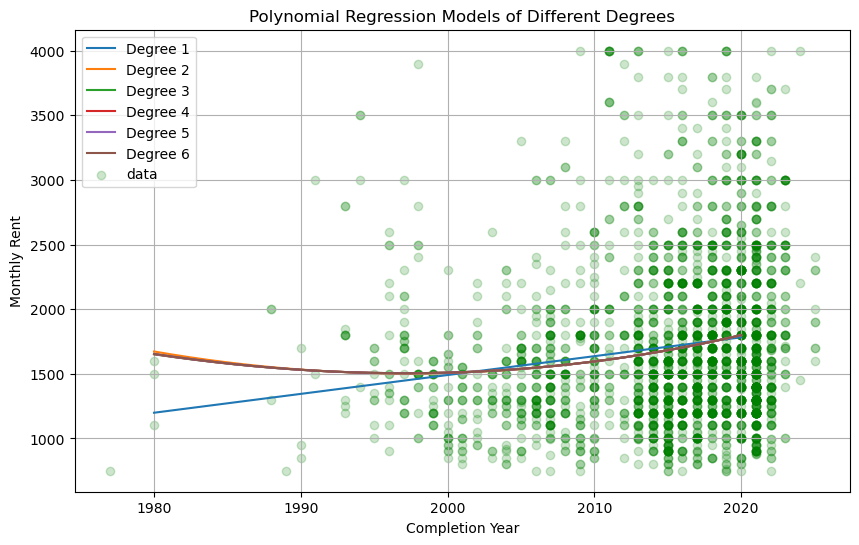

Degree 1 equation:

 
13.91 x - 2.631e+04


Degree 2 equation:

        2
0.5528 x - 2209 x + 2.207e+06


Degree 3 equation:

          3         2
0.007424 x - 44.14 x + 8.75e+04 x - 5.78e+07


Degree 4 equation:

           4         3             2
-0.001331 x + 10.68 x - 3.214e+04 x + 4.299e+07 x - 2.156e+10


Degree 5 equation:

            5            4         3        2
-3.295e-07 x + 0.001979 x - 2.623 x - 5409 x + 1.613e+07 x - 1.077e+10


Degree 6 equation:

            6             5             4         3         2
-8.895e-11 x + 4.148e-07 x - 0.0001101 x - 1.444 x - 523.3 x + 6.847e+06 x - 5.863e+09




In [137]:
# Prepare data
X = hrp[['completion_year']]
y = hrp["monthly_rent"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Fit polynomial regression models of varying degrees
degrees = [1, 2, 3, 4, 5,6] 
plt.figure(figsize=(10, 6))
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print("Degree:", degree, "R-squared:", r2)
    xfit = np.linspace(1980, 2020, 1000)
    yfit = model.predict(xfit[:, np.newaxis])
    plt.plot(xfit, yfit, label=f'Degree {degree}')

# Plot data points
plt.scatter(X_test, y_test, label='data', color='green', alpha=0.2)

# Set plot labels and legend
plt.xlabel('Completion Year')
plt.ylabel('Monthly Rent')
plt.title('Polynomial Regression Models of Different Degrees')
plt.legend()
plt.grid(True)
plt.show()

for degree in range(1, 7):
    # Fit polynomial
    p = np.poly1d(np.polyfit(hrp['completion_year'], hrp['monthly_rent'], degree))
    
    # Print equation
    print(f"Degree {degree} equation:\n")
    print(p)
    print("\n")


It is seen that all the multiple linear regression gives a relatively low r squared value (means lower than 0.8)

So we try grouping the completion year by only taking the mean rent for each year <br>

**We may try the model with model with regression line with degrees from 1 to 7.**

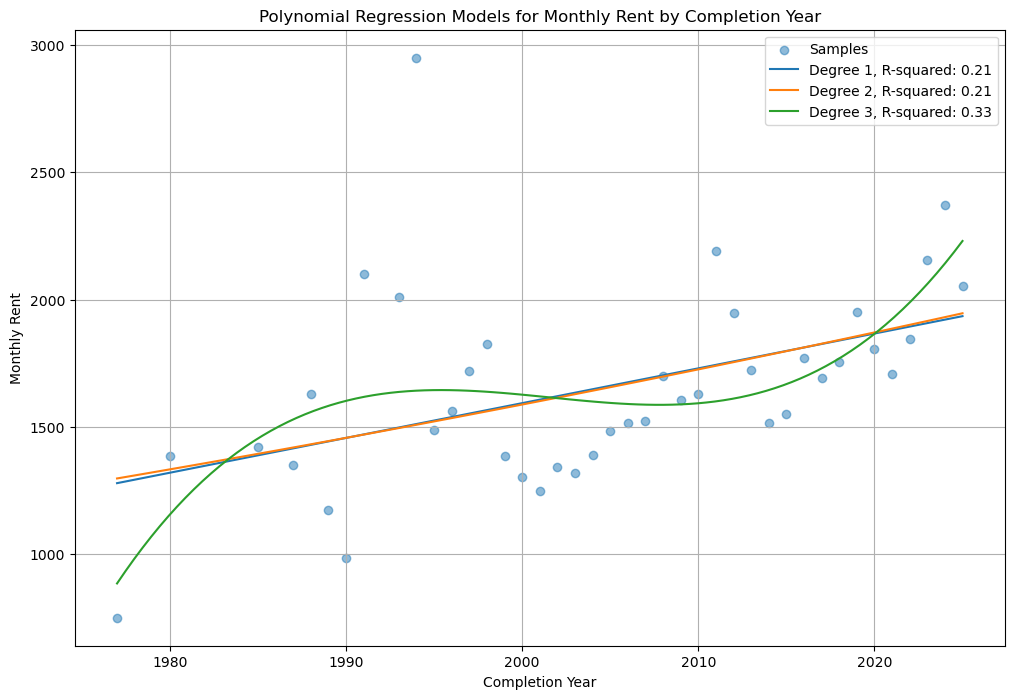

Degree 1 R-squared: 0.21
Degree 2 R-squared: 0.21
Degree 3 R-squared: 0.33
Degree 1 equation:

 
13.91 x - 2.631e+04


Degree 2 equation:

        2
0.5528 x - 2209 x + 2.207e+06


Degree 3 equation:

          3         2
0.007424 x - 44.14 x + 8.75e+04 x - 5.78e+07




In [144]:
# Group by completion year and calculate the mean rent for each year
rent_by_year = hrp.groupby('completion_year')['monthly_rent'].mean()

# Fit polynomial regression models with degrees 1 to 7
degrees = range(1, 4)
r_squared_values = []

plt.figure(figsize=(12, 8))

# Plot scatter plot of the data
plt.scatter(rent_by_year.index, rent_by_year.values, label='Samples', alpha=0.5)

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(rent_by_year.index.values.reshape(-1, 1))
    linear_reg = LinearRegression()
    linear_reg.fit(X_poly, rent_by_year.values)
    
    # Generate predictions
    x_values = np.linspace(min(rent_by_year.index), max(rent_by_year.index), 100).reshape(-1, 1)
    X_poly_pred = poly_features.transform(x_values)
    y_pred = linear_reg.predict(X_poly_pred)
    
    # Calculate R-squared value
    y_pred_train = linear_reg.predict(X_poly)
    r_squared = r2_score(rent_by_year.values, y_pred_train)
    r_squared_values.append(r_squared)
    
    # Plot the regression line
    plt.plot(x_values, y_pred, label=f'Degree {degree}, R-squared: {r_squared:.2f}')

plt.xlabel('Completion Year')
plt.ylabel('Monthly Rent')
plt.title('Polynomial Regression Models for Monthly Rent by Completion Year')
plt.legend()
plt.grid(True)
plt.show()

# Print R-squared values
for degree, r_squared in zip(degrees, r_squared_values):
    print(f"Degree {degree} R-squared: {r_squared:.2f}")
    
for degree in range(1, 4):
    # Fit polynomial
    p = np.poly1d(np.polyfit(hrp['completion_year'], hrp['monthly_rent'], degree))
    
    # Print equation
    print(f"Degree {degree} equation:\n")
    print(p)
    print("\n")


All the different power of regression model give a low r squared value, which suggests it may be underfitted. <br> Thus, we require another approach (model) to predict the monthly rent with respect to completion year.

### 5.3  Random Forest Regressor Model of Monthly Rent and Completion Year

Using the random forest regressor,

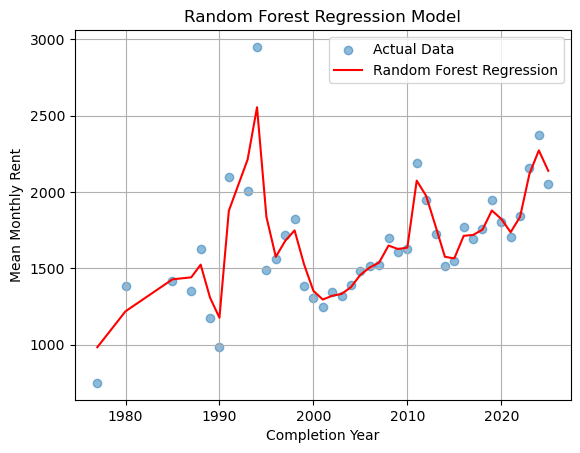

R-squared score: 0.897836185168842


In [106]:
# Group by completion year and calculate the mean rent for each year
rent_by_year = hrp.groupby('completion_year')['monthly_rent'].mean()

# Reshape the data
X = rent_by_year.index.values.reshape(-1, 1)
y = rent_by_year.values

# Initialize Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the data
rf_model.fit(X, y)

# Predict the mean rent using the fitted model
y_pred = rf_model.predict(X)

# Plot the scatter plot of the data
plt.scatter(X, y, label='Actual Data', alpha=0.5)

# Plot the regression line
plt.plot(X, y_pred, color='red', label='Random Forest Regression')

# Add labels and legend
plt.xlabel('Completion Year')
plt.ylabel('Mean Monthly Rent')
plt.title('Random Forest Regression Model')
plt.legend()
plt.grid(True)
plt.show()

r_squared = r2_score(y, y_pred)
print("R-squared score:", r_squared)




Therefore, we gained a linear predictive model with respect to completion year!

<hr>

### Analysis on the predictive model

**We had found that the r-squared value for most of the model to appear way too low, if we use all the values of the monthly rental based on completion year** 
<br><br>
The reason being that the extremely big amount of data (about 20,000) makes the data set are way too scattered and dispersed, where the multiple linear regression model is unable to fit into most of the dataset, means the predictivie model will always underfit.<hr>

**A better approach will be taking the mean rent of each completion year and group it accordingly**
<br><br>
This gives us a better view on the data set as each year has only one data plotted (the mean)
<br>
We found out that by using the `RandomForestRegressor` we will get the overfit of the line of best fit, as our R-squared score will be greater than 0.8.<br>
The reason is becasue a random forest regressor uses average method to improve the predictive model's accuracy, which somehow coherent with the grouping of monthly rent by completion year using the mean.<hr>
<br>
So we decided to use the model with power 3.

### Note that we can't come out with a single equation for the RandomForestRegressor like other multiple linear regression model, as this predictive model uses a combination of mean and decisions from previous data (years) to predict the future data, where the final prediction is actually the average of all other previous predictions.

#### Instead we use a separate function to predict the future outcome

In [129]:
# Define the number of future years to predict
num_future_years = 6

# Generate a range of future years
future_years = np.arange(rent_by_year.index.max() + 1, rent_by_year.index.max() + num_future_years + 1)

# Predict mean monthly rent for future years
future_rent_predictions = rf_model.predict(future_years.reshape(-1, 1))

# Add some random noise to the predictions
noise = np.random.normal(scale=50, size=len(future_rent_predictions))
future_rent_predictions_with_noise = future_rent_predictions + noise

# Print the predicted rental values for future years
for year, rent_prediction in zip(future_years, future_rent_predictions_with_noise):
    print(f"Predicted mean monthly rent for year {year}: ${rent_prediction:.2f}")


Predicted mean monthly rent for year 2026: $2192.27
Predicted mean monthly rent for year 2027: $2142.86
Predicted mean monthly rent for year 2028: $2256.07
Predicted mean monthly rent for year 2029: $2191.39
Predicted mean monthly rent for year 2030: $2144.28
Predicted mean monthly rent for year 2031: $2115.39


**Below predicts using the polynomial regression model (power 3)**

In [98]:
# Years for prediction
predict_years = np.array([2025, 2026, 2027, 2030,2031,2032,2033]).reshape(-1, 1)

# Fit polynomial regression model
degree = 3  # Adjust the degree as needed
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

# Predict mean monthly rent for the years
X_predict = poly_features.transform(predict_years)
rent_predictions = poly_model.predict(X_predict)

# Print predictions
for year, rent_prediction in zip(predict_years.flatten(), rent_predictions):
    print(f"Predicted mean monthly rent for year {year}: ${rent_prediction:.2f}")


Predicted mean monthly rent for year 2025: $2173.34
Predicted mean monthly rent for year 2026: $2254.21
Predicted mean monthly rent for year 2027: $2342.18
Predicted mean monthly rent for year 2030: $2651.60
Predicted mean monthly rent for year 2031: $2770.87
Predicted mean monthly rent for year 2032: $2898.71
Predicted mean monthly rent for year 2033: $3035.39


**Based on the two models above, we found out that the model with power 3 will give a more accurate prediction, because the monthly rental will increase and not decrease for all the following years.**



## Section 6: Discussion
<hr style="height: 1px; background-color: #ccc">

**Question 1**
<br>What are the significant factors that influence the rent for house rentals?<br><br>

Answer: <br>Based on f test, we found out that the significant factors are: <br> ['completion_year', 'rooms', 'parking', 'bathroom', 'size', 'facilities_num', 'distance_to_centre']
<br>


<hr>

**Question 2**<br>
How to predict the  movement of rental in future years based on previous trends?<br>

Answer:<br> We could put some input to the regression equation, that could gives the overall evaluation on how would the rental fee goes in the future.

The regression equation:<br><br>
$$ \hat{y} = 0.0074x^3 -44.14x^2 +8.75*10^4x - 5.78*10^7$$


For example:

In the year of 2026, the estimated mean room price would be:


ŷ = RM 1931.04



compare to mean room price when 2021 which is RM 1705.44 #actually why I get –ve when sub in

<hr>

**Question 3**<br>
How to find the most suitable rental area (or property name, type etc) to be invested, or rented?<br>

Answer:<br>
1. For rental, the specific requirement could be inserted to the equation, and it could present a tenant either the locus, that is available, or the rental price (if specified the location)
<br>
2. The equation of hyperplane based on all the 7 significant factors that affect the rent:<br><br>
$$ \hat{y} = 20.91x_1 + -170x_2 -14.63x_3 +122.71x_4 +1.24x_5 +21.40x_6 +-19.57x_7 -41431.6 $$

where:<br>

$x_1$: completion_year <br>
$x_2$: rooms <br>
$x_3$: parking <br>
$x_4$: bathroom <br>
$x_5$: size  <br>
$x_6$: facilities_num  <br>
$x_7$: distance_to_centre <br>
$E(X)$: expected monthly rent for that specific type of room  <br><br>

<hr>

**Question 4**<br>

For property developers, where to potentially build a new housing area?

Answer:<br> 
Based on the heatmap in section 4.2.6, property developers is suggested to build a new property at the yellow and green areas, because these are the areas that have potential to give back a high return of investment (ROI).



## Section 7: Conclusion
<hr style="height: 1px; background-color: #ccc">

In conclusion, this study provides a complete analysis of the significant factors influencing property rental prices while predicting future rental trends to make constructive decisions. There are mainly 7 crucial factors that impact rental prices which provide insights into market dynamics which are 'completion_year', 'rooms', 'parking', 'bathroom', 'size', 'facilities_num' and 'distance_to_centre'. <br><br> 

Furthermore, the investigation included multiple linear regression model, polynomial regression model and random forest regression model to predict future rental movements. Additionally, the study also addresses pragmatic applications for property developers to focus on potential regions particularly green and yellow area in the heatmap to build new housing projects. <br><br>

Based on the data-driven findings into the rental market, there are some suggestions that have been proposed to the public. Specifically, tenants should always consider the various factors that affects the rental to find a most suitable rent that suits themselves the best, while investor should keep an eye on the events that will make rental price fluctuates before investing a property.<br><br>

Finally, property developers should focus on potential area to build a property by monitoring different areas based on the different aspects. In short, the findings emphasize on the significance of data analysis and predictive models in understanding and forecasting rental market dynamics, aiming to enhance decision-making and investment strategies in the real estate sector.


## References
<hr style="height: 1px; background-color: #ccc">

Chan, K. H., Ho, G. Y., Lim, F. Y., Lim, M. Y., & Yap, Y. L. (2018). Determinants of housing price index in Malaysia (Doctoral dissertation, UTAR).<br><br>

Hayes, A. (2024, January 23) Understanding the Mechanics of Real Estate Banking. Investopedia. https://www.investopedia.com/mechanics-of-real-estate-banking-8415143<br><br>


Zainon, N., Mohd-Rahim, F. A., Sulaiman, S., Abd-Karim, S. B., & Hamzah, A. (2017). Factors affecting the demand of affordable housing among the middle-	income groups in Klang Valley Malaysia. Journal of Design and Built Environment, 1-10. https://doi.org/10.22452/jdbe.sp2017no1.1

[Top of Page](#top)